In [1]:
%matplotlib inline
import gc
import pandas as pd
import glob
import sklearn
import numpy as np
import matplotlib

In [4]:
diFiles=glob.glob("../data/Di/*")
diFiles

['../data/Di/Jnk.csv',
 '../data/Di/IRF4.csv',
 '../data/Di/LEF1.csv',
 '../data/Di/Ikk2.csv',
 '../data/Di/CTNNB1.csv',
 '../data/Di/Erk.csv',
 '../data/Di/MYC.csv']

In [6]:
trainIndexFiles=glob.glob("../Train/*")
frames = list()
for f in trainIndexFiles:
    indices = pd.read_csv(f,sep=";")
    indexList=list(indices['0'])
    protein = f.split("/")[-1].split(".")[0]
    fpath = '../data/Di/'+f.split("/")[-1].split(".")[0]+".csv"
    diRead = pd.read_csv(fpath,sep=";")
    diPartialTrain=diRead[diRead.columns[5:]].loc[indexList].copy()
    diPartialTrain.insert(0,column='Protein',value =protein )
    del diRead
    gc.collect()
    frames.append(diPartialTrain)

In [7]:
diTrain = pd.concat(frames)

In [8]:
diTrain.to_csv("../FullTrain/FullTrainDI/FullTrainDI.csv")

In [9]:
diTrain.head()

,Protein,X0min_neg_effect-X0min_neg_cause,X15min_effect-X0min_neg_cause,X15min_effect-X15min_cause,X30min_effect-X0min_neg_cause,X30min_effect-X15min_cause,X30min_effect-X30min_cause,X90min_effect-X0min_neg_cause,X90min_effect-X15min_cause,X90min_effect-X30min_cause,...,X240min_effect-X240min_cause,X360min_effect-X0min_neg_cause,X360min_effect-X15min_cause,X360min_effect-X30min_cause,X360min_effect-X90min_cause,X360min_effect-X120min_cause,X360min_effect-X180min_cause,X360min_effect-X210min_cause,X360min_effect-X240min_cause,X360min_effect-X360min_cause
1530,LEF1,-1.398215,-1.332073,-1.176495,-1.152913,-0.997335,-1.138456,-0.748848,-0.593270,-0.734391,...,2.750291,-0.626720,-0.471142,-0.612263,-0.798977,0.539404,1.340642,1.469409,1.965642,1.504612
1531,LEF1,-1.398215,-2.044245,-2.118504,-1.532107,-1.606366,-1.470422,-1.569035,-1.643294,-1.507350,...,0.370043,-1.108882,-1.183141,-1.047197,-0.874397,-1.075918,-0.703188,-0.427842,-0.257982,0.510709
1532,LEF1,-1.788833,-2.585672,-2.277672,-1.168975,-0.860975,-1.271061,0.322233,0.630234,0.220148,...,1.514755,-0.227687,0.080314,-0.329772,0.364790,0.983367,0.419474,2.833032,1.480500,3.645275
1533,LEF1,-1.788833,-1.823722,-1.514011,-1.545921,-1.236210,-1.757871,-0.847480,-0.537768,-1.059429,...,0.379215,-3.095851,-2.786140,-3.307800,-3.017836,-3.030779,-2.279847,-2.823244,-2.188745,-2.846625
1535,LEF1,-1.375053,-1.252870,-1.363479,-0.796131,-0.906741,-1.598657,-0.169129,-0.279739,-0.971655,...,1.312185,0.099997,-0.010613,-0.702529,-0.537396,-0.619269,-0.279518,-0.051200,0.444093,-0.952516


In [10]:
lstn_clusters=range(2,30)

In [11]:
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [12]:
file = open('../ClusteringOutputs/DI_Clustering/diMiniBatch.txt','w')  
bestOut = open('../ClusteringOutputs/DI_Clustering/diBestMiniBatch.txt','w') 
file.write("n_clusters,s_score\n")

19

In [13]:
dfLabels=pd.DataFrame()

In [16]:
dfLabels['Protein'] = diTrain['Protein'].tolist()

In [15]:
max_silhouette=0
nClusters=2

for n in lstn_clusters:
    mbk=MiniBatchKMeans(init='k-means++', n_clusters=n
                        , max_no_improvement=10, verbose=0)
    mbk.fit(diTrain[diTrain.columns[1:]])
    labels = mbk.labels_
    s_score = silhouette_score(diTrain[diTrain.columns[1:]], labels, metric='euclidean')
    dfLabels['NClusters'+str(n)] = n
    dfLabels['Labels_'+str(n)] =labels
    file.write(str(n)+",")
    file.write(str(s_score)+"\n")
    if s_score>max_silhouette:
        max_silhouette = s_score
        nClusters=n
#t_mini_batch = time.time() - t0    
#print("Num clusters " + str(n))
bestOut.write("Num clusters " + str(n))
#print("Silhouette score " + str(max_silhouette))
bestOut.write("Silhouette score " + str(max_silhouette))
#print("Running time " + str(t_mini_batch))
file.close()
bestOut.close()
file.close()
bestOut.close()

KeyboardInterrupt: 

In [17]:
type(dfLabels)

pandas.core.frame.DataFrame

In [18]:
dfLabels.head()

,Protein,NClusters2,Labels_2,NClusters3,Labels_3,NClusters4,Labels_4,NClusters5,Labels_5,NClusters6,...,NClusters11,Labels_11,NClusters12,Labels_12,NClusters13,Labels_13,NClusters14,Labels_14,NClusters15,Labels_15
0,LEF1,2,1,3,2,4,0,5,4,6,...,11,3,12,2,13,5,14,0,15,9
1,LEF1,2,1,3,2,4,1,5,0,6,...,11,10,12,6,13,5,14,1,15,8
2,LEF1,2,1,3,2,4,0,5,4,6,...,11,5,12,2,13,11,14,13,15,9
3,LEF1,2,1,3,0,4,1,5,0,6,...,11,7,12,6,13,10,14,10,15,3
4,LEF1,2,1,3,2,4,0,5,2,6,...,11,10,12,1,13,5,14,1,15,12


In [ ]:
dfLabels.to_csv('../ClusteringOutputs/DI_Clustering/DILabelsKmeans.csv')

In [47]:
mbk=MiniBatchKMeans(init='k-means++', n_clusters=5
                        , max_no_improvement=10, verbose=0)
mbk.fit(diTrain[diTrain.columns[1:]])
labels = mbk.labels_
s_score = silhouette_score(diTrain[diTrain.columns[1:]], labels, metric='euclidean')

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=3, svd_solver='full')

In [50]:
pca.fit(diTrain[diTrain.columns[1:]])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [51]:
pca_3d = pca.transform(diTrain[diTrain.columns[1:]]).T

In [52]:
len(pca_3d)

3

In [53]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [54]:
x=pca_3d[0]
y=pca_3d[1]
z=pca_3d[2]

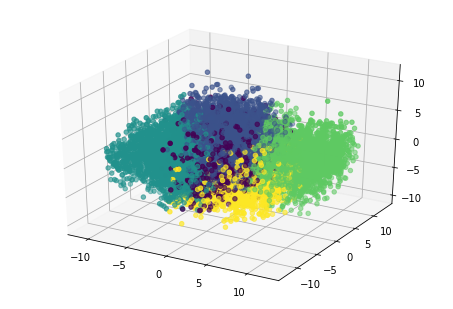

In [55]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z,c=labels)
pyplot.show()